# Pymaceuticals Inc.
---

### Analysis

- In conclusion, the strong positive correlation between mouse weight and average tumor volume in the Capomulin regimen is a significant finding. This relationship, if substantiated with further research, could impact how the treatment is administered and how its effectiveness is evaluated. 
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the combined DataFrame for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
number_of_mice

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicates['Mouse ID'].unique()

print(f"Mouse IDs with duplicate 'Mouse ID' and 'Timepoint' entries: {duplicate_mice_ids}")

Mouse IDs with duplicate 'Mouse ID' and 'Timepoint' entries: ['g989']


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ids)]

# Display the data for the duplicate mouse ID(s)
print(duplicate_mice_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mice_ids)]

print(clean_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [9]:
# Checking the number of mice in the clean DataFrame.
# Check the number of unique mice in the clean dataset
number_of_mice = clean_data['Mouse ID'].nunique()
number_of_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_by_regimen = clean_data.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})
summary_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

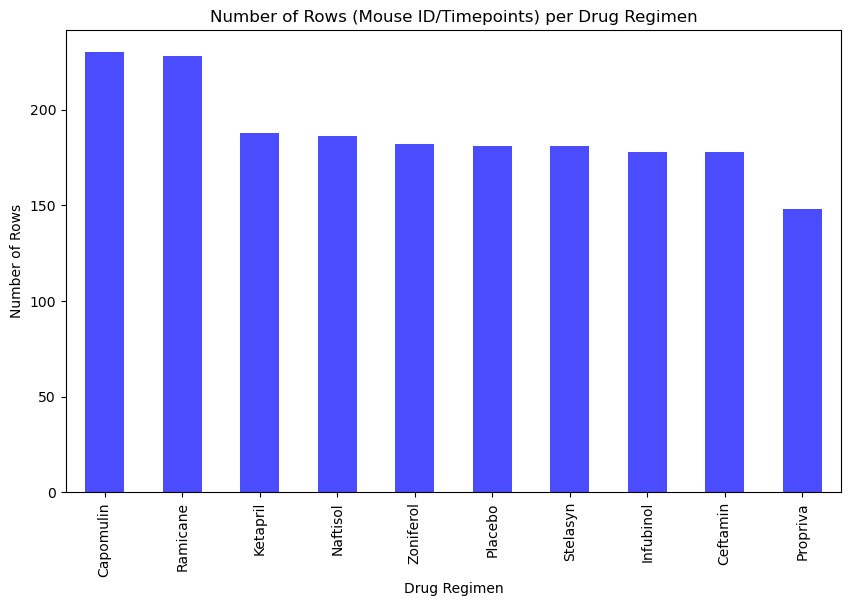

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Get the count of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

regimen_counts.plot(kind='bar', figsize=(10,6), color='blue', alpha=0.7)
plt.title('Number of Rows (Mouse ID/Timepoints) per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=90)

plt.show()

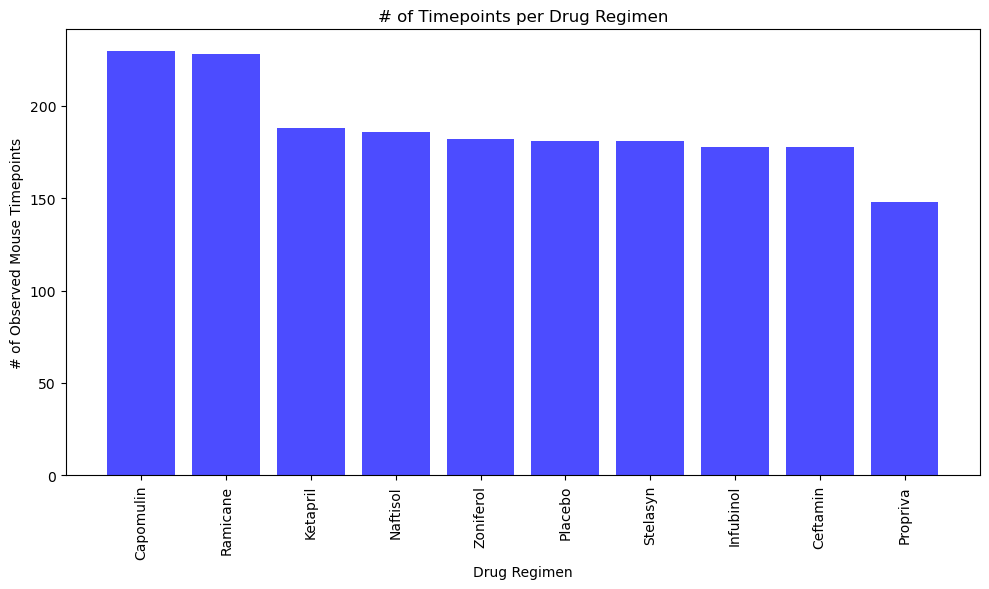

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Get drug regimen names (they're the index of the regimen_counts Series)
regimen_names = regimen_counts.index

plt.figure(figsize=(10,6))
plt.bar(regimen_names, regimen_counts, color='blue', alpha=0.7)
plt.title('# of Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

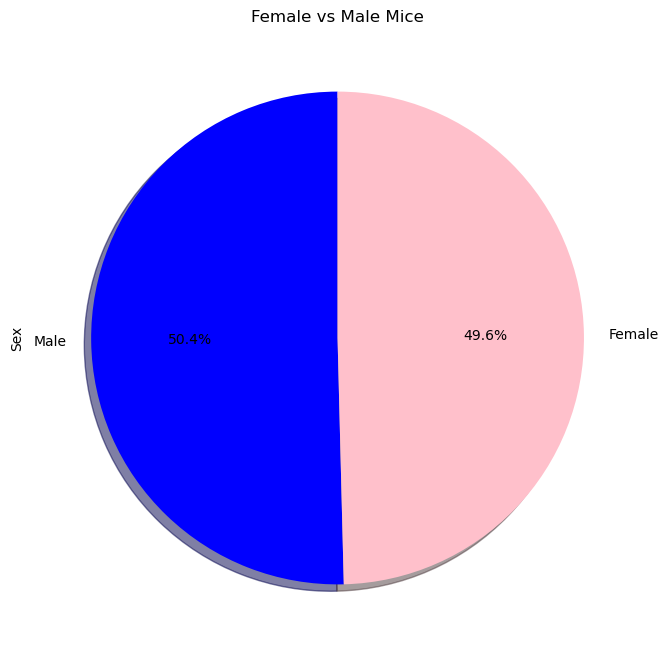

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Filter data to get unique Mouse IDs
unique_mice = clean_data.drop_duplicates(subset='Mouse ID')

# Get the distribution of male and female mice
gender = unique_mice['Sex'].value_counts()

gender.plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'], shadow=True)
plt.title('Female vs Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_data = clean_data[clean_data['Drug Regimen'].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = treatment_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')
print(final_tumor_volume[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']])

   Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
0      a203         45           67.973419    Infubinol
1      a251         45           65.525743    Infubinol
2      a275         45           62.999356     Ceftamin
3      a411         45           38.407618     Ramicane
4      a444         45           43.047543     Ramicane
..      ...        ...                 ...          ...
95     y769         45           68.594745     Ceftamin
96     y793         45           31.896238    Capomulin
97     y865         45           64.729837     Ceftamin
98     z578         45           30.638696     Ramicane
99     z581         45           62.754451    Infubinol

[100 rows x 4 columns]


In [23]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Iterate over each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append the final volume to the tumor_vol_data list
    tumor_vol_data.append(final_volume)
    
    # Calculate the IQR
    quartiles = final_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_volume[(final_volume < lower_bound) | (final_volume > upper_bound)]
    
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


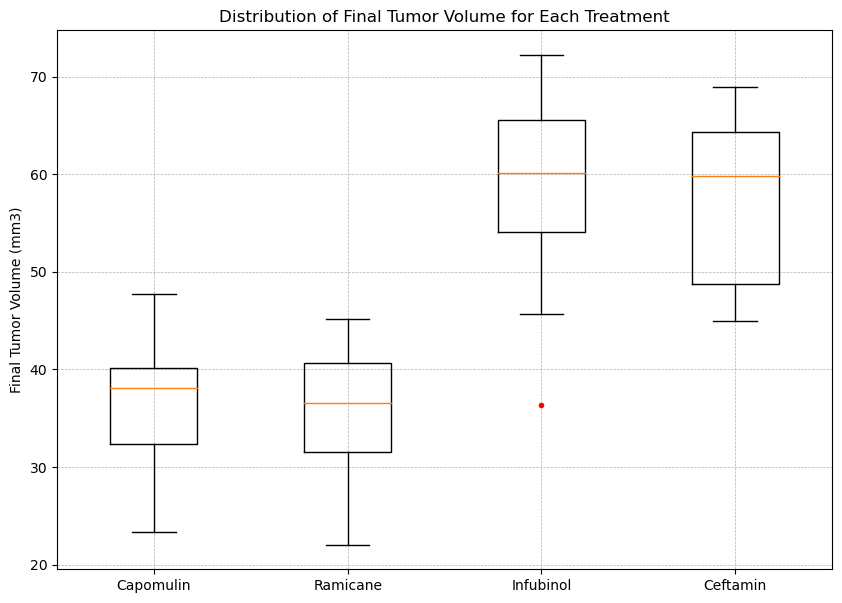

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(tumor_vol_data, sym='r.')
ax.set_title('Distribution of Final Tumor Volume for Each Treatment')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(treatments)
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

plt.show()

## Line and Scatter Plots

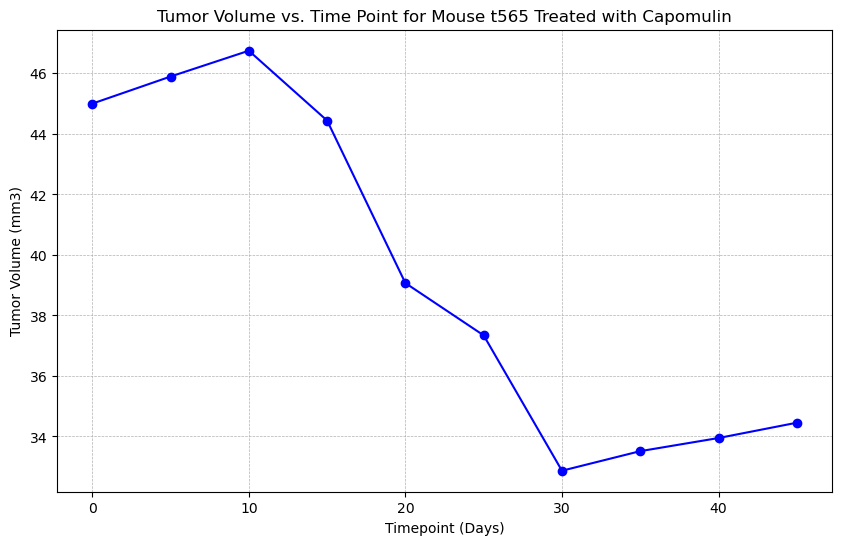

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Choose a mouse. For this example, let's pick one at random.
sample_mouse = capomulin_data['Mouse ID'].sample(1).values[0]

# Get the data for that mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == sample_mouse]

# Generate the line plot
plt.figure(figsize=(10,6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title(f'Tumor Volume vs. Time Point for Mouse {sample_mouse} Treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

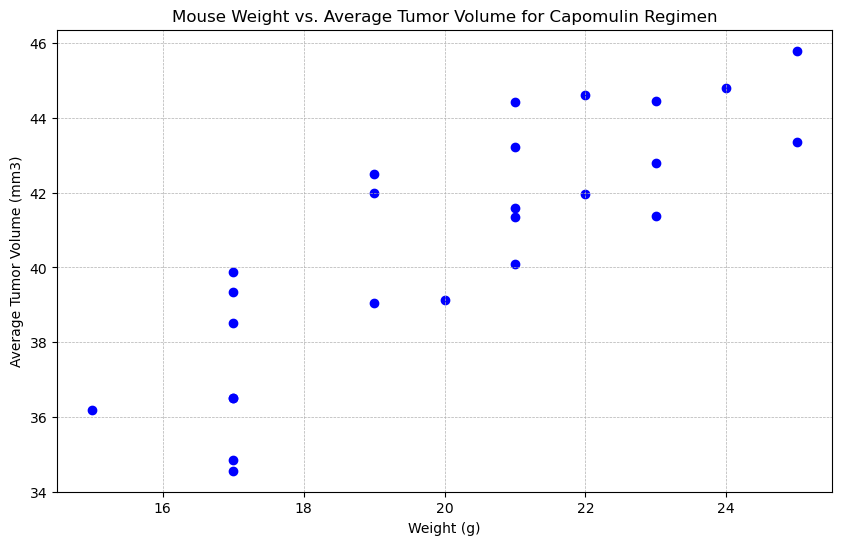

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
grouped_data = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'mean'
}).reset_index()

plt.figure(figsize=(10,6))
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


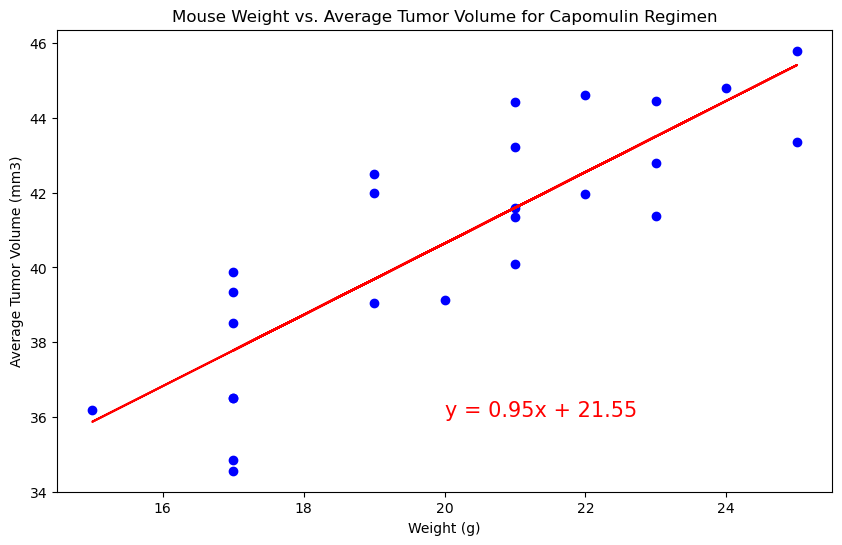

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {correlation_coefficient:.2f}")

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the linear regression model on top of the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'], color='blue')
plt.plot(grouped_data['Weight (g)'], slope * grouped_data['Weight (g)'] + intercept, "r-")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq, (20, 36), fontsize=15, color='red')

plt.show()
